In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [7]:
# Load dataset
data = pd.read_csv('diabetes.csv')

# Display basic information and summary statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

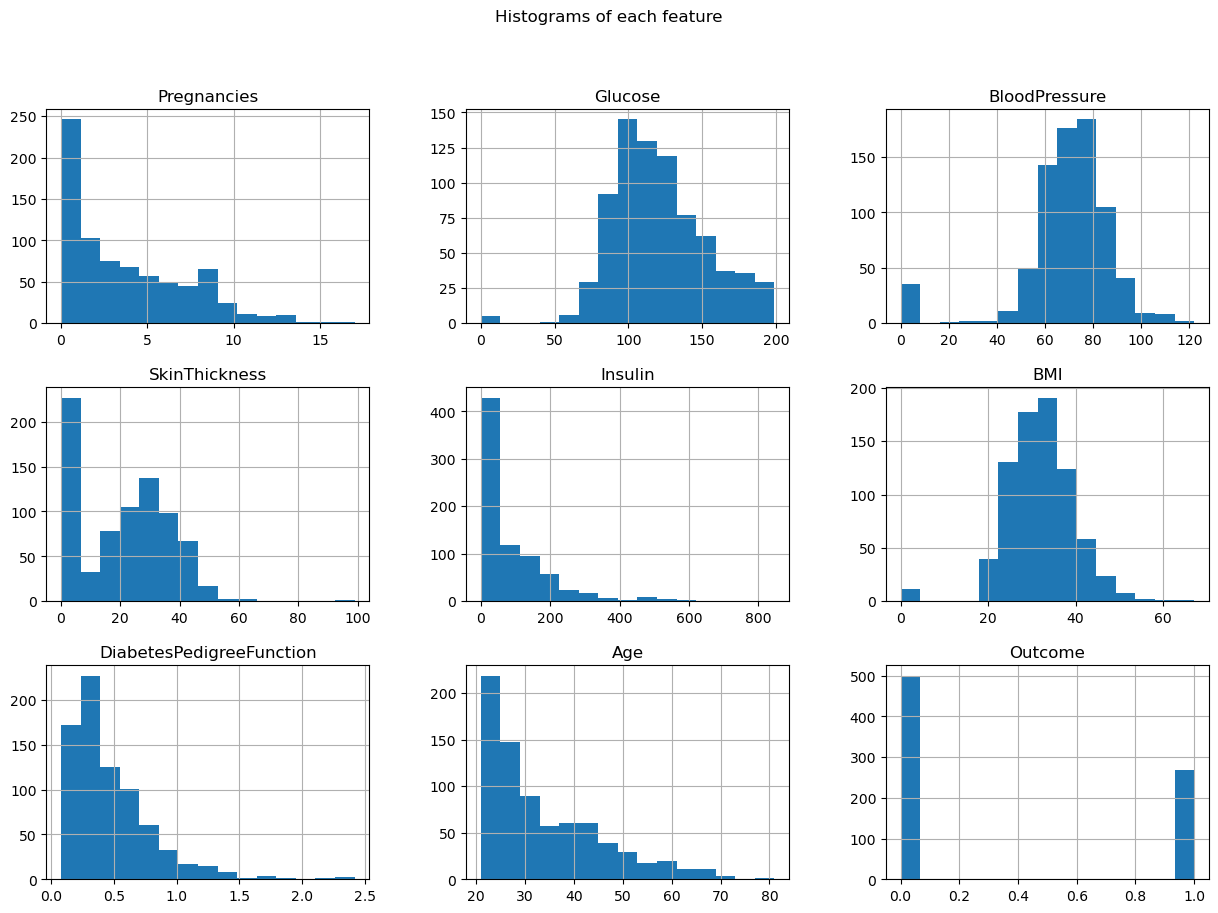

In [9]:
# Display histograms of each feature
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of each feature')
plt.show()

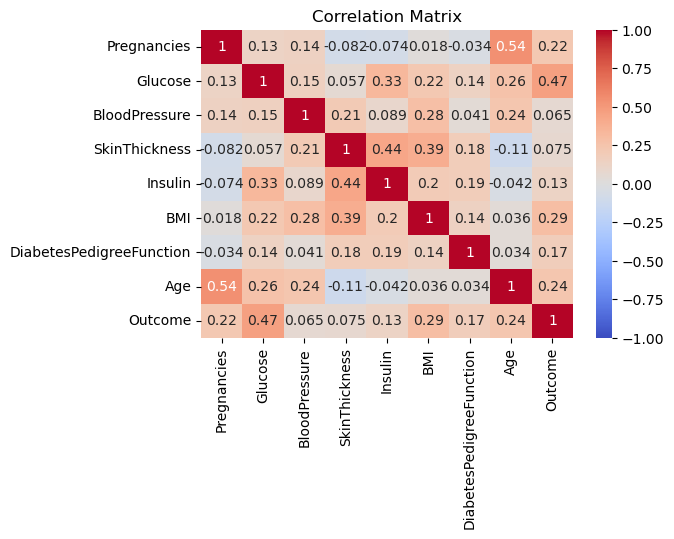

In [10]:
# Display correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


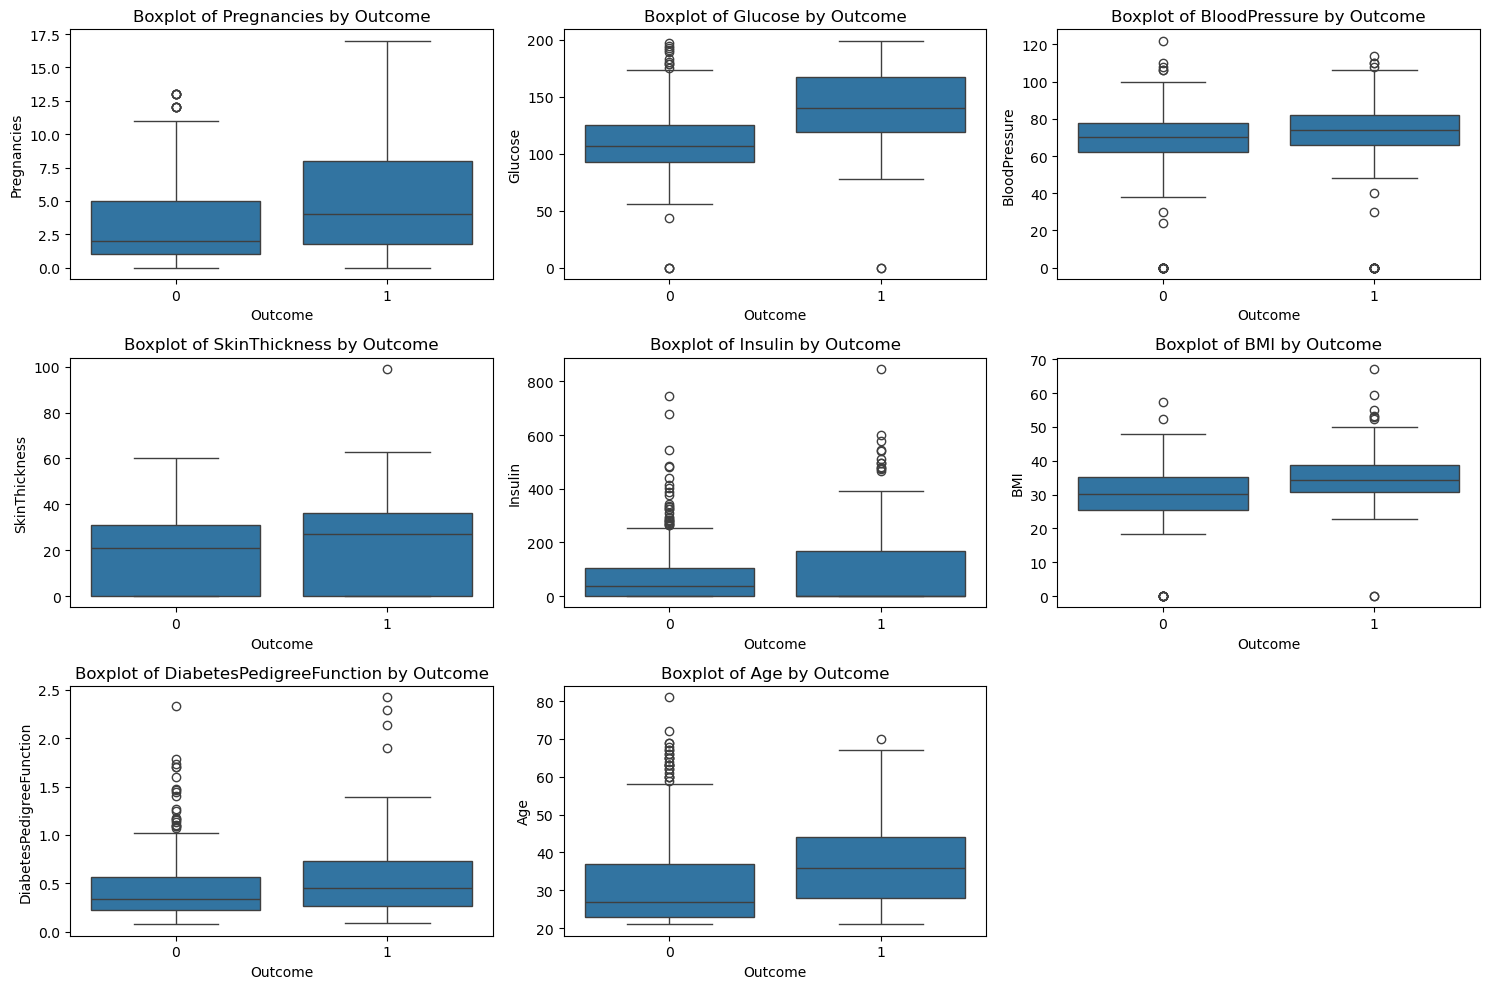

In [13]:
# Boxplots for each feature by Outcome
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()

In [15]:
# Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Handle missing values by replacing 0 with NaN for specific columns, then filling with median values
X[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = X[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
X.fillna(X.median(), inplace=True)

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Handle missing values (replace 0 with NaN for specific columns)
X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Impute missing values with the median of the training set
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_train.median(), inplace=True)  # Use training median to impute test set


# Check shapes after imputing
print("X_train shape after handling missing values:", X_train.shape)

X_train shape after handling missing values: (614, 8)


In [17]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from imblearn.combine import SMOTETomek

# Apply SMOTE with Tomek Links to balance the training data
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)


In [21]:

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.decomposition import PCA

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_resampled)
X_test_poly = poly.transform(X_test_scaled)

# Check shapes after polynomial features
print("X_train_poly shape:", X_train_poly.shape)

# Power transformation
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train_poly)
X_test_transformed = pt.transform(X_test_poly)

# Debug: Check shapes after power transformation
print("X_train_transformed shape:", X_train_transformed.shape)
print("y_train shape after power transformation:", y_train.shape)


X_train_poly shape: (766, 36)
X_train_transformed shape: (766, 36)
y_train shape after power transformation: (614,)


In [23]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        99
           1       0.57      0.73      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154

Accuracy: 0.7078
AUC: 0.7622



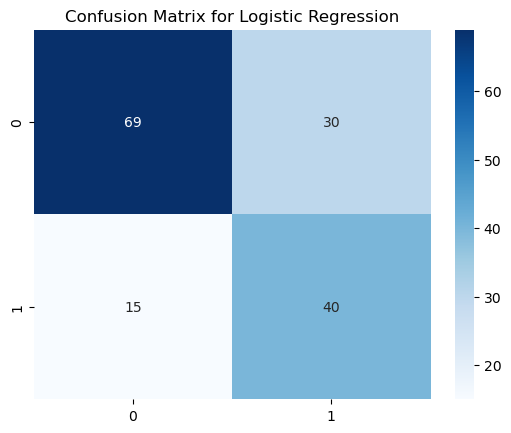

Training Random Forest...
Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

Accuracy: 0.7532
AUC: 0.8200



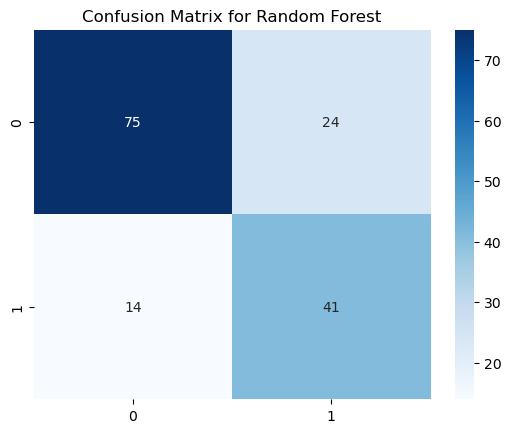

Training Support Vector Machine...
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154

Accuracy: 0.7208
AUC: 0.7601



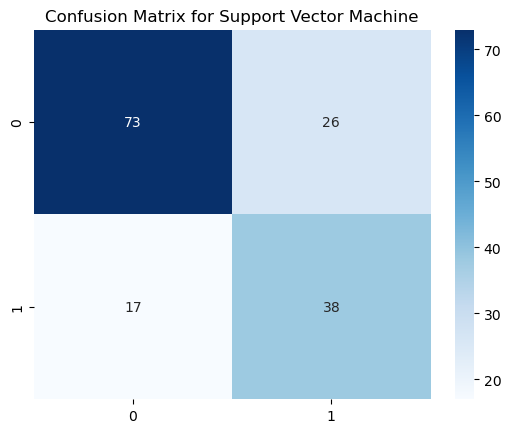

Training K-Nearest Neighbors...


C:\Users\jotin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jotin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.87      0.61      0.71        99
           1       0.54      0.84      0.66        55

    accuracy                           0.69       154
   macro avg       0.71      0.72      0.69       154
weighted avg       0.75      0.69      0.69       154

Accuracy: 0.6883
AUC: 0.7535



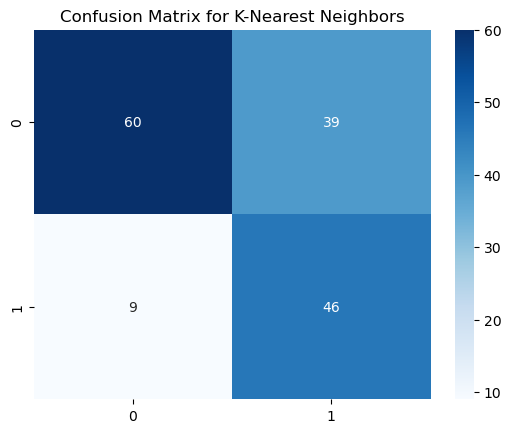

Training Naive Bayes...
Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Accuracy: 0.7597
AUC: 0.8077



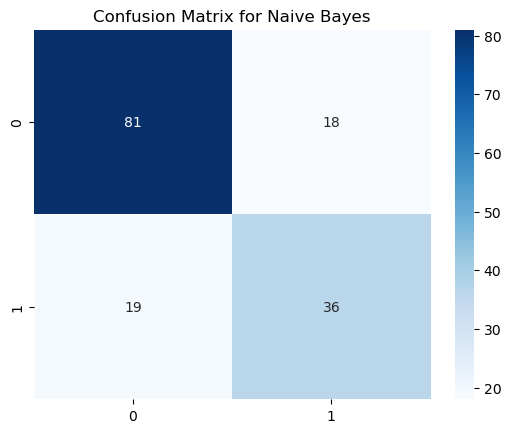

In [25]:
# Store metrics for comparison
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train_transformed, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_transformed)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append to metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    # Print classification report and confusion matrix
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}\n")
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

C:\Users\jotin\AppData\Local\Temp\ipykernel_68156\3123011393.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, orient='h', palette='viridis')


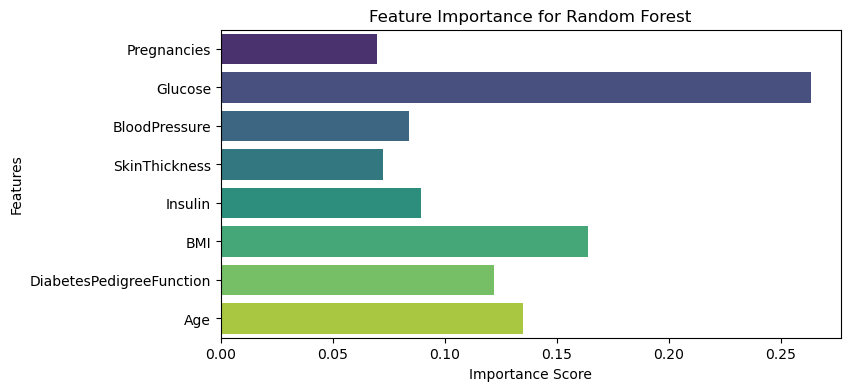

In [27]:

# Feature Importance Plot for models that support it
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature_importances_ attribute
        # Retrain model on non-transformed data to get meaningful feature importances
        model.fit(X_train, y_train)
        importances = model.feature_importances_
        feature_names = X.columns  # Original feature names

        # Plot feature importances
        plt.figure(figsize=(8, 4))
        sns.barplot(x=importances, y=feature_names, orient='h', palette='viridis')
        plt.title(f"Feature Importance for {model_name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.show()


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.707792   0.571429  0.727273  0.640000
1           Random Forest  0.753247   0.630769  0.745455  0.683333
2  Support Vector Machine  0.720779   0.593750  0.690909  0.638655
3     K-Nearest Neighbors  0.688312   0.541176  0.836364  0.657143
4             Naive Bayes  0.759740   0.666667  0.654545  0.660550


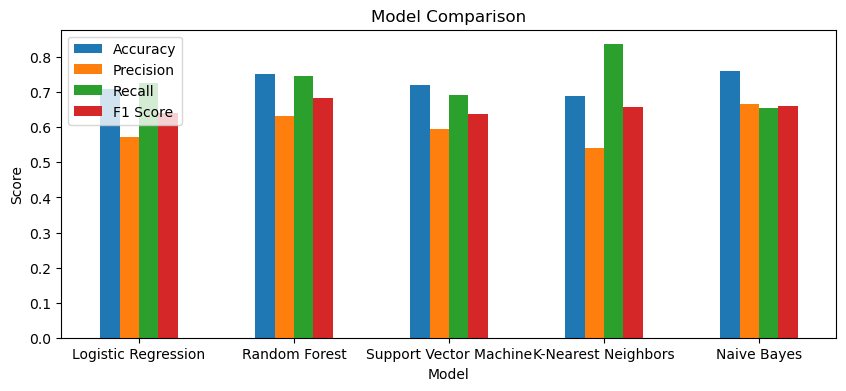

In [29]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Visualize model comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 4))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

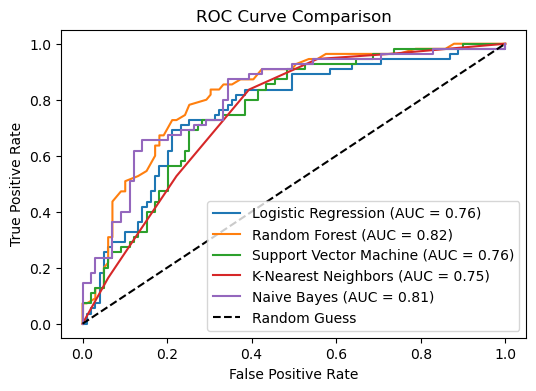

In [31]:
# Plot ROC Curve for each model
plt.figure(figsize=(6, 4))
for model_name, model in models.items():
    # Ensure model is trained on transformed data if needed
    model.fit(X_train_transformed, y_train_resampled)
    
    # Predict probabilities or decision function
    y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_transformed)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_value = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_value:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

